Михаил Сурцуков Автоэнкодеры в Keras, Часть 2: Manifold learning и скрытые (latent) переменные.     
https://habr.com/ru/post/331500/

In [1]:
import numpy as np
from numpy import random as rng

import tensorflow as tf
from tensorflow.keras.datasets import mnist

(x_train,target_train),(x_test,target_test) = mnist.load_data()

x_train = x_train[:,:,:,np.newaxis].astype('float32')/ 255.
x_test  = x_test [:,:,:,np.newaxis].astype('float32')/ 255.

x_train.shape

(60000, 28, 28, 1)

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model

from tensorflow.keras.optimizers import Adam

# from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import UpSampling2D


model_encoder = Sequential([
        Conv2D(128,(7,7),activation='relu',padding='same'),
        MaxPooling2D((2,2),padding='same'),
        Conv2D(32,(2,2),activation='relu',padding='same'),
        MaxPooling2D((2,2),padding='same'),
        Conv2D(1,(7,7), activation='relu', padding='same')
    ], name='encoder')

model_decoder = Sequential([
        Conv2D(32,(7,7),activation='relu',padding='same'),
        UpSampling2D((2,2)),
        Conv2D(128,(2,2),activation='relu',padding='same'),
        UpSampling2D((2,2)),
        Conv2D(1,(7,7),activation='sigmoid',padding='same'),
    ], name='decoder')

model_aenc = Sequential([model_encoder,model_decoder],name='autoencoder')

# Dense(2,activation='linear'),

2022-06-08 11:33:00.237967: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-08 11:33:00.265130: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-08 11:33:00.265441: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-08 11:33:00.266474: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [3]:
%%time

model_aenc.compile(optimizer=Adam(learning_rate=.0005), loss='binary_crossentropy')

history = model_aenc.fit(
    x_train,x_train,
    epochs=20,
    batch_size=1024, 
    shuffle=True,
    validation_data=(x_test,x_test),
)

Epoch 1/20


2022-06-08 11:33:01.870198: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8400


59/59 [==============================] - 23s 343ms/step - loss: 0.4583 - val_loss: 0.2696
Epoch 2/20
59/59 [==============================] - 19s 316ms/step - loss: 0.1985 - val_loss: 0.1526
Epoch 3/20
59/59 [==============================] - 19s 316ms/step - loss: 0.1322 - val_loss: 0.1161
Epoch 4/20
59/59 [==============================] - 19s 316ms/step - loss: 0.1122 - val_loss: 0.1064
Epoch 5/20
59/59 [==============================] - 19s 316ms/step - loss: 0.1047 - val_loss: 0.1007
Epoch 6/20
59/59 [==============================] - 19s 316ms/step - loss: 0.1002 - val_loss: 0.0969
Epoch 7/20
59/59 [==============================] - 19s 316ms/step - loss: 0.0971 - val_loss: 0.0945
Epoch 8/20
59/59 [==============================] - 19s 316ms/step - loss: 0.0949 - val_loss: 0.0925
Epoch 9/20
59/59 [==============================] - 19s 316ms/step - loss: 0.0931 - val_loss: 0.0909
Epoch 10/20
59/59 [==============================] - 19s 315ms/step - loss: 0.0917 - val_loss: 0.0906


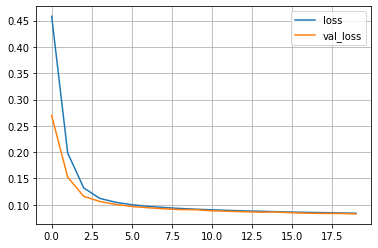

In [4]:
from matplotlib import pyplot as plt

for k in history.history: plt.plot(history.history[k],label=k)
plt.legend()
plt.grid()

In [5]:
from matplotlib import pyplot as plt

def plot_digits(x):
    n = len(x)    
    plt.figure(figsize=(16,2))
    for i in range(n):
        plt.subplot(1,n,i+1)
        plt.imshow(x[i],cmap='gray')
        plt.xticks([])
        plt.yticks([])
    plt.show()

# гомотопия по прямой между объектами или между кодами
def homotopy(x,n=10):
    return np.array([ x[0]*(1.-t) + x[1]*t for t in np.linspace(0.,1.,n) ])

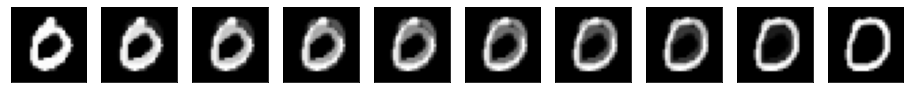

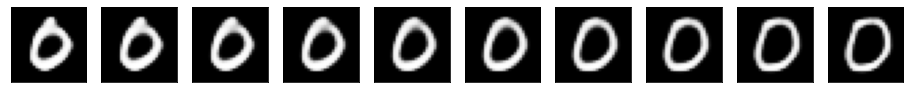

- - - - - - - - - - 


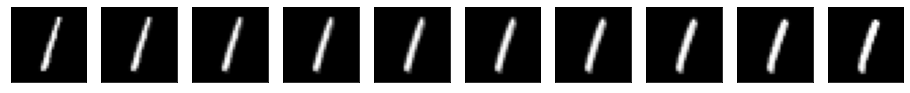

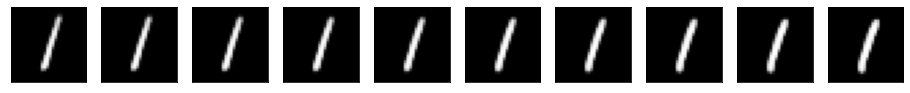

- - - - - - - - - - 


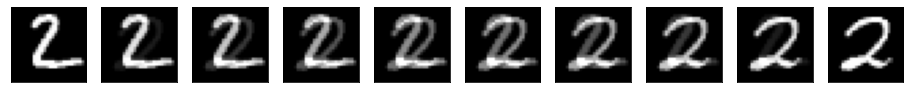

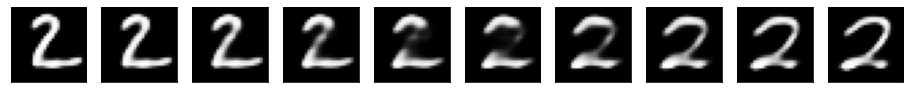

- - - - - - - - - - 


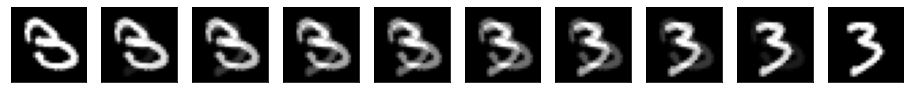

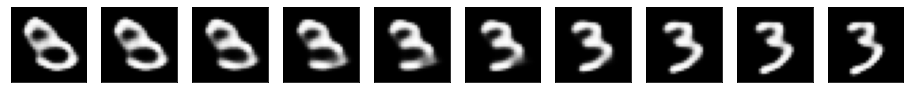

- - - - - - - - - - 


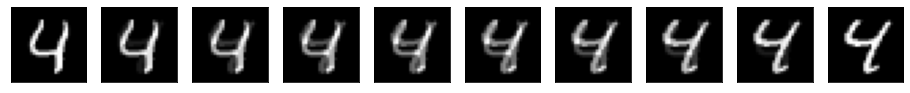

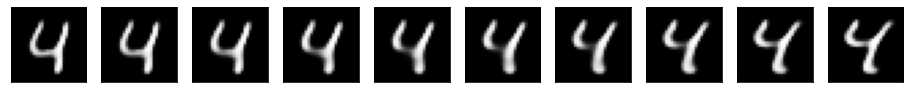

- - - - - - - - - - 


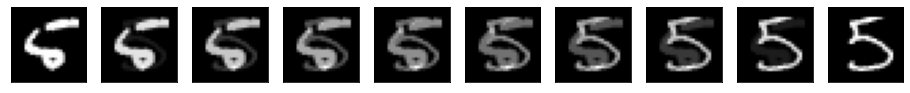

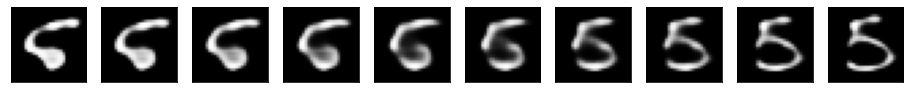

- - - - - - - - - - 


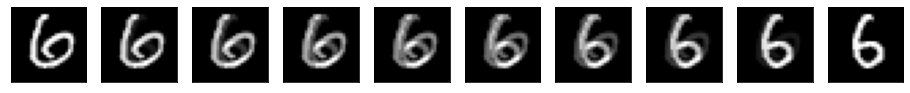

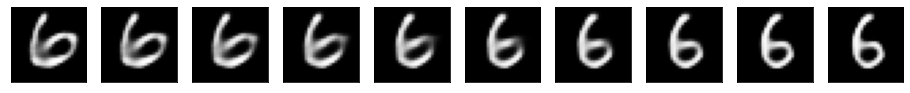

- - - - - - - - - - 


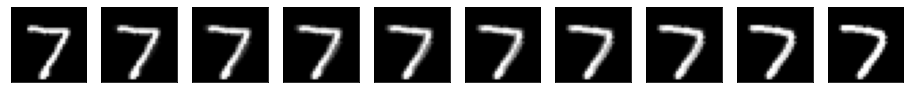

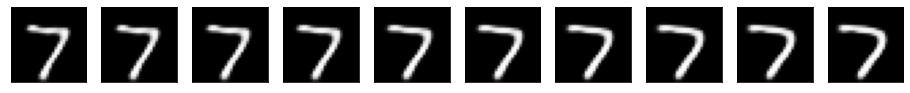

- - - - - - - - - - 


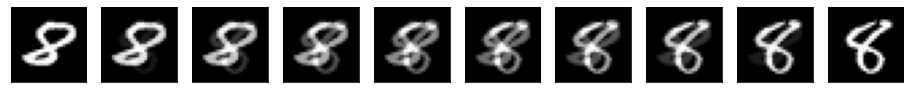

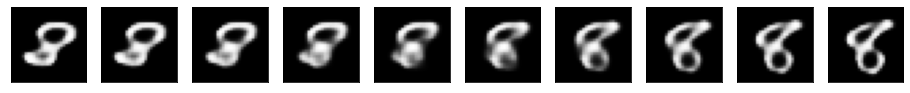

- - - - - - - - - - 


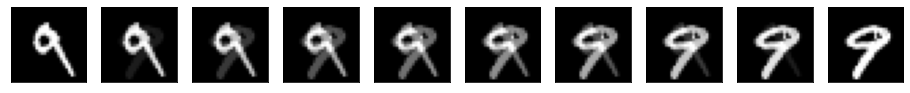

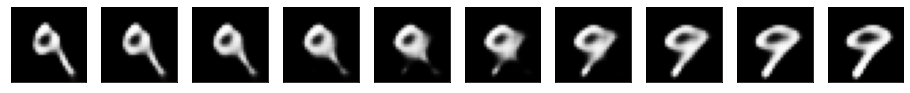

- - - - - - - - - - 


In [8]:
for i in range(10):
    # гомотопия между первыми двумя восьмерками
    img_pair = x_test[target_test==i][:2]
    plot_digits( homotopy( img_pair ) )

    # гомотопия между кодами
    pair_codes = model_encoder.predict(img_pair)
    plot_digits(  model_decoder.predict( homotopy(pair_codes) ) )
    
    print('- '*10)

----

In [7]:
# !pip3 install watermark
# Python package versions used
%load_ext watermark
%watermark --python
%watermark --iversions
#

Python implementation: CPython
Python version       : 3.8.9
IPython version      : 8.0.1

matplotlib: 3.5.1
tensorflow: 2.8.0
numpy     : 1.22.2
keras     : 2.8.0

